In [197]:
import os
import re
import pandas as pd

from collections import Counter
from pathlib import Path

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

pd.options.display.max_rows = 1000

## Data

In [88]:
data_dir = Path('../data/transfer/preprocessed/splits.en/en-shp/word')

In [108]:
lines = []
with open(data_dir / 'train.shp') as f:
    for line in f.read().split('\n'):
        if len(line):
            lines.append(line)
            
c = Counter((' '.join(lines)).split(' '))
d = []
for v, k in c.items():
    if k == 1:
        d.append(v)
S = len(lines)
T = len((' '.join(lines)).split(' '))
V = len(list(set((' '.join(lines)).split(' '))))
HLT = len(d)
print(f'shp -> S: {S} | T: {T} | V: {V} | HLT: {HLT}')

shp -> S: 7332 | T: 31222 | V: 4082 | HLT: 2421


In [111]:
31222 /37757

0.8269195116137404

In [109]:
lines = []
with open(data_dir / 'train.en') as f:
    for line in f.read().split('\n'):
        if len(line):
            lines.append(line)
            
c = Counter((' '.join(lines)).split(' '))
d = []
for v, k in c.items():
    if k == 1:
        d.append(v)
S = len(lines)
T = len((' '.join(lines)).split(' '))
V = len(list(set((' '.join(lines)).split(' '))))
HLT = len(d)
print(f'en -> S: {S} | T: {T} | V: {V} | HLT: {HLT}')

en -> S: 7332 | T: 37757 | V: 2644 | HLT: 1159


## Translate

In [249]:
results_dir = Path('../results/rnn')

In [250]:
train_res_dir = results_dir / 'translate'

In [251]:
errors = []
results_translate = pd.DataFrame(columns=['lang', 'corpus', 'segment', 'bleu'])
for folder in os.listdir(train_res_dir):
    #if '-shp' in folder:
        corpus_dir = train_res_dir / folder
        for segment in os.listdir(corpus_dir):
            segment_dir = corpus_dir / segment
            with open(segment_dir / 'train.log') as f:
                finds = re.findall('test bleu:(.*)\[', f.read())
                if len(finds):
                    bleu = float(finds[0])
                    results_translate.loc[-1] = [folder.split('_')[0], folder.split('_')[1], segment, bleu]
                    results_translate.index = results_translate.index + 1
                else:
                    errors.append(segment_dir)
        
    #print(folder)

In [252]:
errors

[PosixPath('../results/rnn/translate/shp-es_Religioso_300_512/bpe_drop_9000'),
 PosixPath('../results/rnn/translate/shp-es_Religioso_300_512/bpe_drop_7000'),
 PosixPath('../results/rnn/translate/shp-es_Religioso_300_512/bpe_9000'),
 PosixPath('../results/rnn/translate/shp-es_Religioso_300_512/bpe_drop_5000'),
 PosixPath('../results/rnn/translate/shp-es_Religioso_300_512/bpe_6000'),
 PosixPath('../results/rnn/translate/shp-es_Religioso_300_512/bpe_4000'),
 PosixPath('../results/rnn/translate/shp-es_Religioso_300_512/bpe_drop_4000'),
 PosixPath('../results/rnn/translate/shp-es_Religioso_300_512/bpe_drop_1000'),
 PosixPath('../results/rnn/translate/shp-es_Religioso_300_512/bpe_8000')]

In [246]:
results_translate['flag_drop'] = results_translate.segment.str.contains('drop') * 1

In [231]:
bpe_drop_vol_educ = results_translate.loc[(results_translate.segment.str.contains('bpe_drop')) &\
                                 (results_translate.corpus.str.contains('Educ')) &\
                                 (results_translate.lang.str.contains('es-shp')) &\
                                 (results_translate.flag_drop == 1)]
bpe_drop_vol_educ['n_oper'] = bpe_drop_vol_educ.segment.apply(lambda x: int(x.split('_')[-1]))
bpe_drop_vol_educ = bpe_drop_vol_educ.sort_values(by='n_oper').reset_index(drop=True)

/home/krivas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


/home/krivas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Text(0, 0.5, 'BLEU')

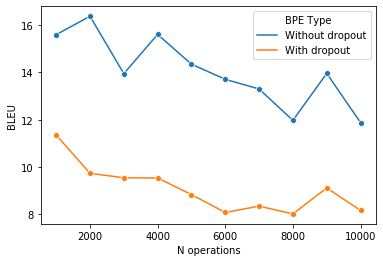

In [232]:
bpe_vol_educ = results_translate.loc[(results_translate.segment.str.contains('bpe')) &\
                                 (results_translate.corpus.str.contains('Educ')) &\
                                 (results_translate.lang.str.contains('es-shp'))]
bpe_vol_educ['n_oper'] = bpe_vol_educ.segment.apply(lambda x: int(x.split('_')[-1]))
bpe_vol_educ = bpe_vol_educ.sort_values(by='n_oper').reset_index(drop=True)
bpe_vol_educ['BPE Type'] = bpe_vol_educ.flag_drop.replace({0: 'Without dropout', 1: 'With dropout'})
sns.lineplot(x='n_oper', y='bleu', data=bpe_vol_educ, hue='BPE Type', marker='o')
plt.xlabel('N operations', fontsize=10)
plt.ylabel('BLEU', fontsize=10)

/home/krivas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Text(0, 0.5, 'BLEU')

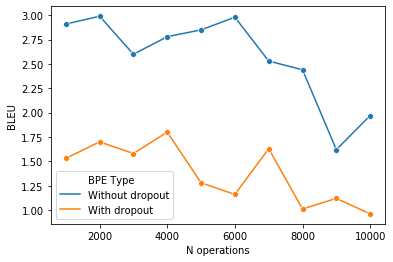

In [233]:
bpe_vol_educ = results_translate.loc[(results_translate.segment.str.contains('bpe')) &\
                                 (results_translate.corpus.str.contains('Relig')) &\
                                 (results_translate.lang.str.contains('es-shp'))]
bpe_vol_educ['n_oper'] = bpe_vol_educ.segment.apply(lambda x: int(x.split('_')[-1]))
bpe_vol_educ = bpe_vol_educ.sort_values(by='n_oper').reset_index(drop=True)
bpe_vol_educ['BPE Type'] = bpe_vol_educ.flag_drop.replace({0: 'Without dropout', 1: 'With dropout'})
sns.lineplot(x='n_oper', y='bleu', data=bpe_vol_educ, hue='BPE Type', marker='o')
plt.xlabel('N operations', fontsize=10)
plt.ylabel('BLEU', fontsize=10)

In [254]:
results_translate

,lang,corpus,segment,bleu
78,shp-es,Educativo,char,0.60
77,shp-es,Educativo,bpe_drop_10000,5.85
76,shp-es,Educativo,bpe_drop_2000,6.38
75,shp-es,Educativo,bpe_drop_3000,5.79
74,shp-es,Educativo,bpe_1000,9.58
73,shp-es,Educativo,bpe_3000,9.05
72,shp-es,Educativo,bpe_7000,8.93
71,shp-es,Educativo,bpe_drop_8000,5.06
70,shp-es,Educativo,bpe_10000,8.57
69,shp-es,Educativo,bpe_2000,9.44


# Transfer baseline

In [235]:
transfer_res_dir = results_dir / 'transfer_baseline'

In [236]:
!find ../ -name *ipynb_checkpoints* -exec rm -rf {} \;

find: ‘../nb/.ipynb_checkpoints’: No such file or directory
find: ‘../results/rnn/translate/es-shp_Educativo_300_512/char/.ipynb_checkpoints’: No such file or directory
find: ‘../results/rnn/transfer_top/splits.es/es-ru_300_512/char/.ipynb_checkpoints’: No such file or directory
find: ‘../results/rnn/transfer_top/splits.es/es-ru_300_512/word/.ipynb_checkpoints’: No such file or directory
find: ‘../results/rnn/transfer_top/splits.es/es-ru_300_512/bpe_5000/.ipynb_checkpoints’: No such file or directory
find: ‘../results/rnn/transfer_top/splits.es/es-ru_300_512/bpe_drop_5000/.ipynb_checkpoints’: No such file or directory
find: ‘../results/rnn/transfer_top/splits.es/es-fi_300_512/char/.ipynb_checkpoints’: No such file or directory
find: ‘../results/rnn/transfer_top/splits.es/es-hu_300_512/char/.ipynb_checkpoints’: No such file or directory
find: ‘../results/rnn/transfer_top/splits.en/en-tk_300_512/char/.ipynb_checkpoints’: No such file or directory
find: ‘../results/rnn/transfer_top/splits

In [237]:
errors = []
results_transfer = pd.DataFrame(columns=['lang', 'corpus', 'segment', 'bleu'])
for folder in os.listdir(transfer_res_dir):
    corpus_dir = transfer_res_dir / folder
    for segment in os.listdir(corpus_dir):
            segment_dir = corpus_dir / segment
            with open(segment_dir / 'train.log') as f:
                finds = re.findall('test bleu:(.*)\[', f.read())
                if len(finds):
                    bleu = float(finds[0])
                    results_transfer.loc[-1] = [folder.split('_')[0], folder.split('_')[1], segment, bleu]
                    results_transfer.index = results_transfer.index + 1
                else:
                    errors.append(segment_dir)
        
    print(folder)

es-shp_300_512
en-shp_300_512


In [238]:
errors

[]

In [239]:
results_transfer

,lang,corpus,segment,bleu
7,es-shp,300,char,31.80
6,es-shp,300,word,23.86
5,es-shp,300,bpe_5000,25.85
4,es-shp,300,bpe_drop_5000,18.51
3,en-shp,300,char,30.68
2,en-shp,300,word,32.75
1,en-shp,300,bpe_5000,30.31
0,en-shp,300,bpe_drop_5000,17.47


# Transfer

In [75]:
transfer_res_dir = results_dir / 'transfer_top'

In [76]:
!find ../ -name *ipynb_checkpoints* -exec rm -rf {} \;

In [82]:
split

'es-ru_300_512'

In [85]:
errors = []
results_transfer_top = pd.DataFrame(columns=['lang', 'corpus', 'segment', 'bleu'])
for folder in os.listdir(transfer_res_dir):
    corpus_dir = transfer_res_dir / folder
    for split in os.listdir(corpus_dir):
        split_dir = corpus_dir / split
        for segment in os.listdir(split_dir):
            segment_dir = split_dir / segment
            with open(segment_dir / 'train.log') as f:
                finds = re.findall('test bleu:(.*)\[', f.read())
                if len(finds):
                    bleu = float(finds[0])
                    results_transfer_top.loc[-1] = [folder, split.split('_')[0], segment, bleu]
                    results_transfer_top.index = results_transfer_top.index + 1
                else:
                    errors.append(segment_dir)
        
    print(folder)

FileNotFoundError: [Errno 2] No such file or directory: '../results/rnn/transfer_top/splits.es/es-pl_300_512/char/train.log'

In [86]:
results_transfer_top

,lang,corpus,segment,bleu
3,splits.es,es-ru,char,28.15
2,splits.es,es-ru,word,12.52
1,splits.es,es-ru,bpe_5000,13.36
0,splits.es,es-ru,bpe_drop_5000,10.56


In [79]:
finds

['  28.15 ']

In [65]:
errors

[]

In [66]:
results_transfer

,lang,corpus,segment,bleu
7,es-shp,300,char,21.13
6,es-shp,300,word,23.86
5,es-shp,300,bpe_5000,25.85
4,es-shp,300,bpe_drop_5000,18.51
3,en-shp,300,char,18.66
2,en-shp,300,word,32.75
1,en-shp,300,bpe_5000,30.31
0,en-shp,300,bpe_drop_5000,17.47
